In [1]:
from tensorflow.keras.models import load_model

In [3]:
#LOADING THE TRAINED MODEL
model = load_model("resnet.h5")

In [4]:
#PRE-PROCESSING THE IMAGE FOR TESTING
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

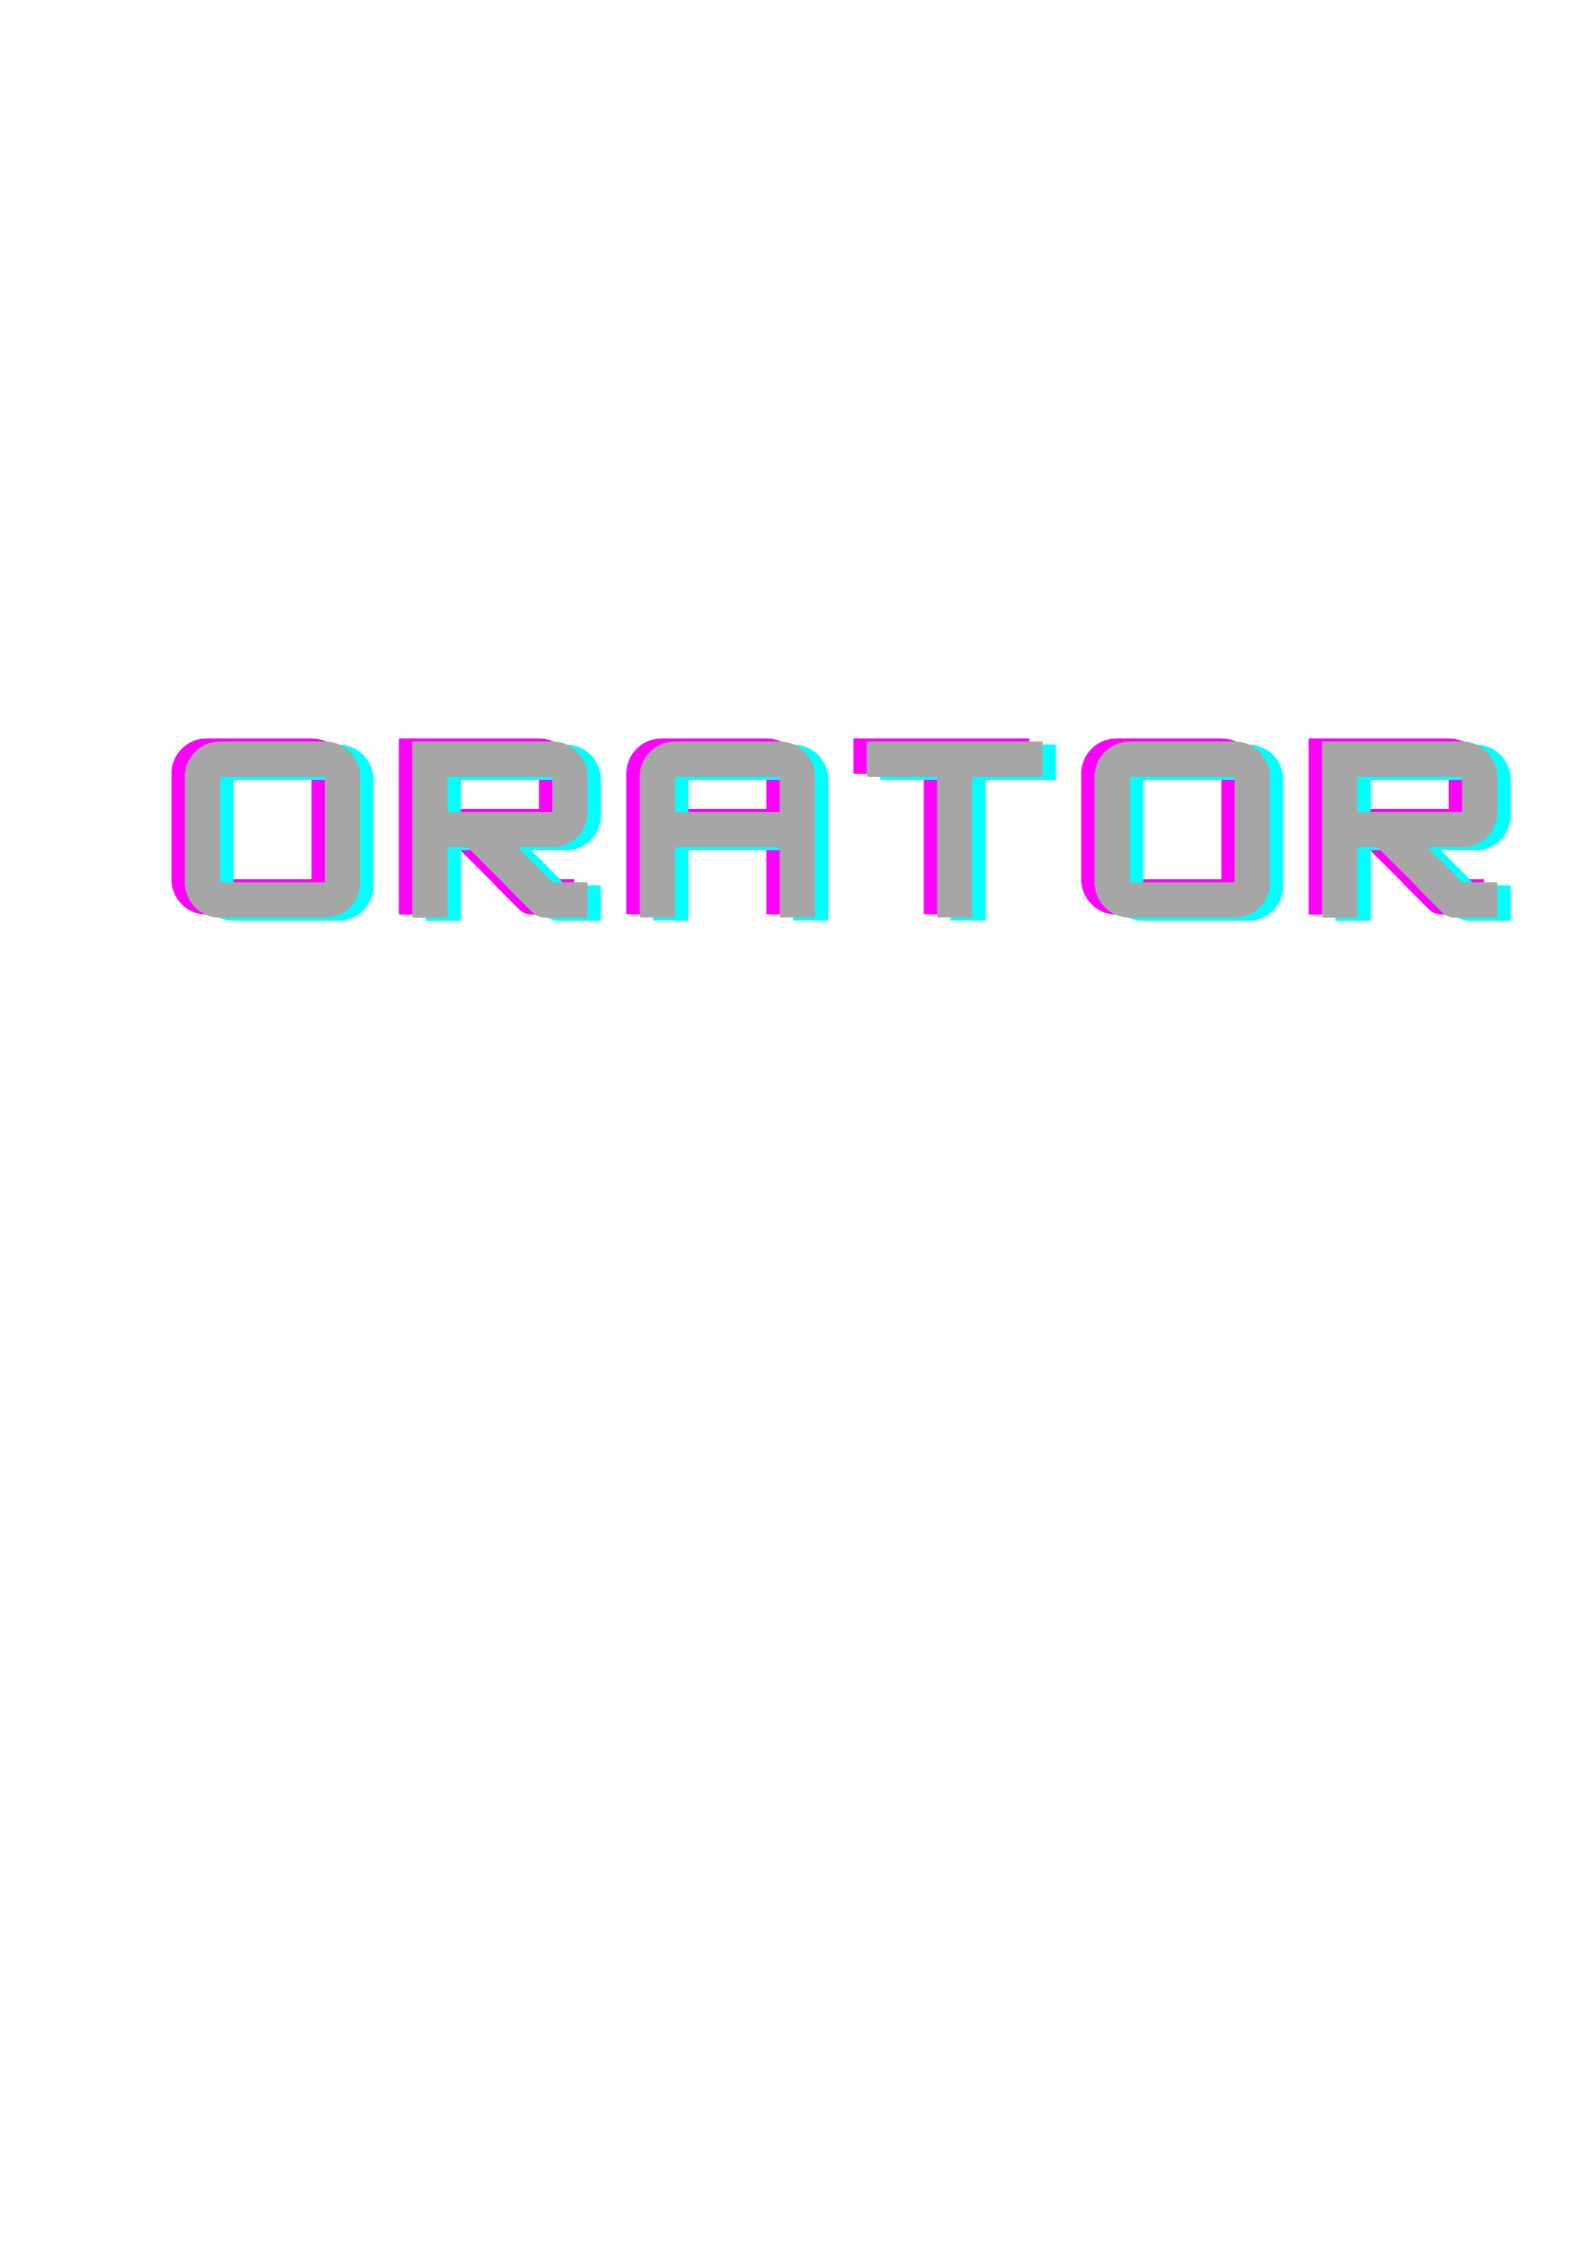

In [38]:
real_image_path = r"C:\Users\vijja\Downloads\orator.jpg"
Image.open(real_image_path)
# "C:\Users\vijja\Downloads\archive (10)\CASIA2\Au\Au_txt_10103.jpg"

In [39]:
image_size = (224, 224)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 85).resize(image_size)).flatten() / 255.0

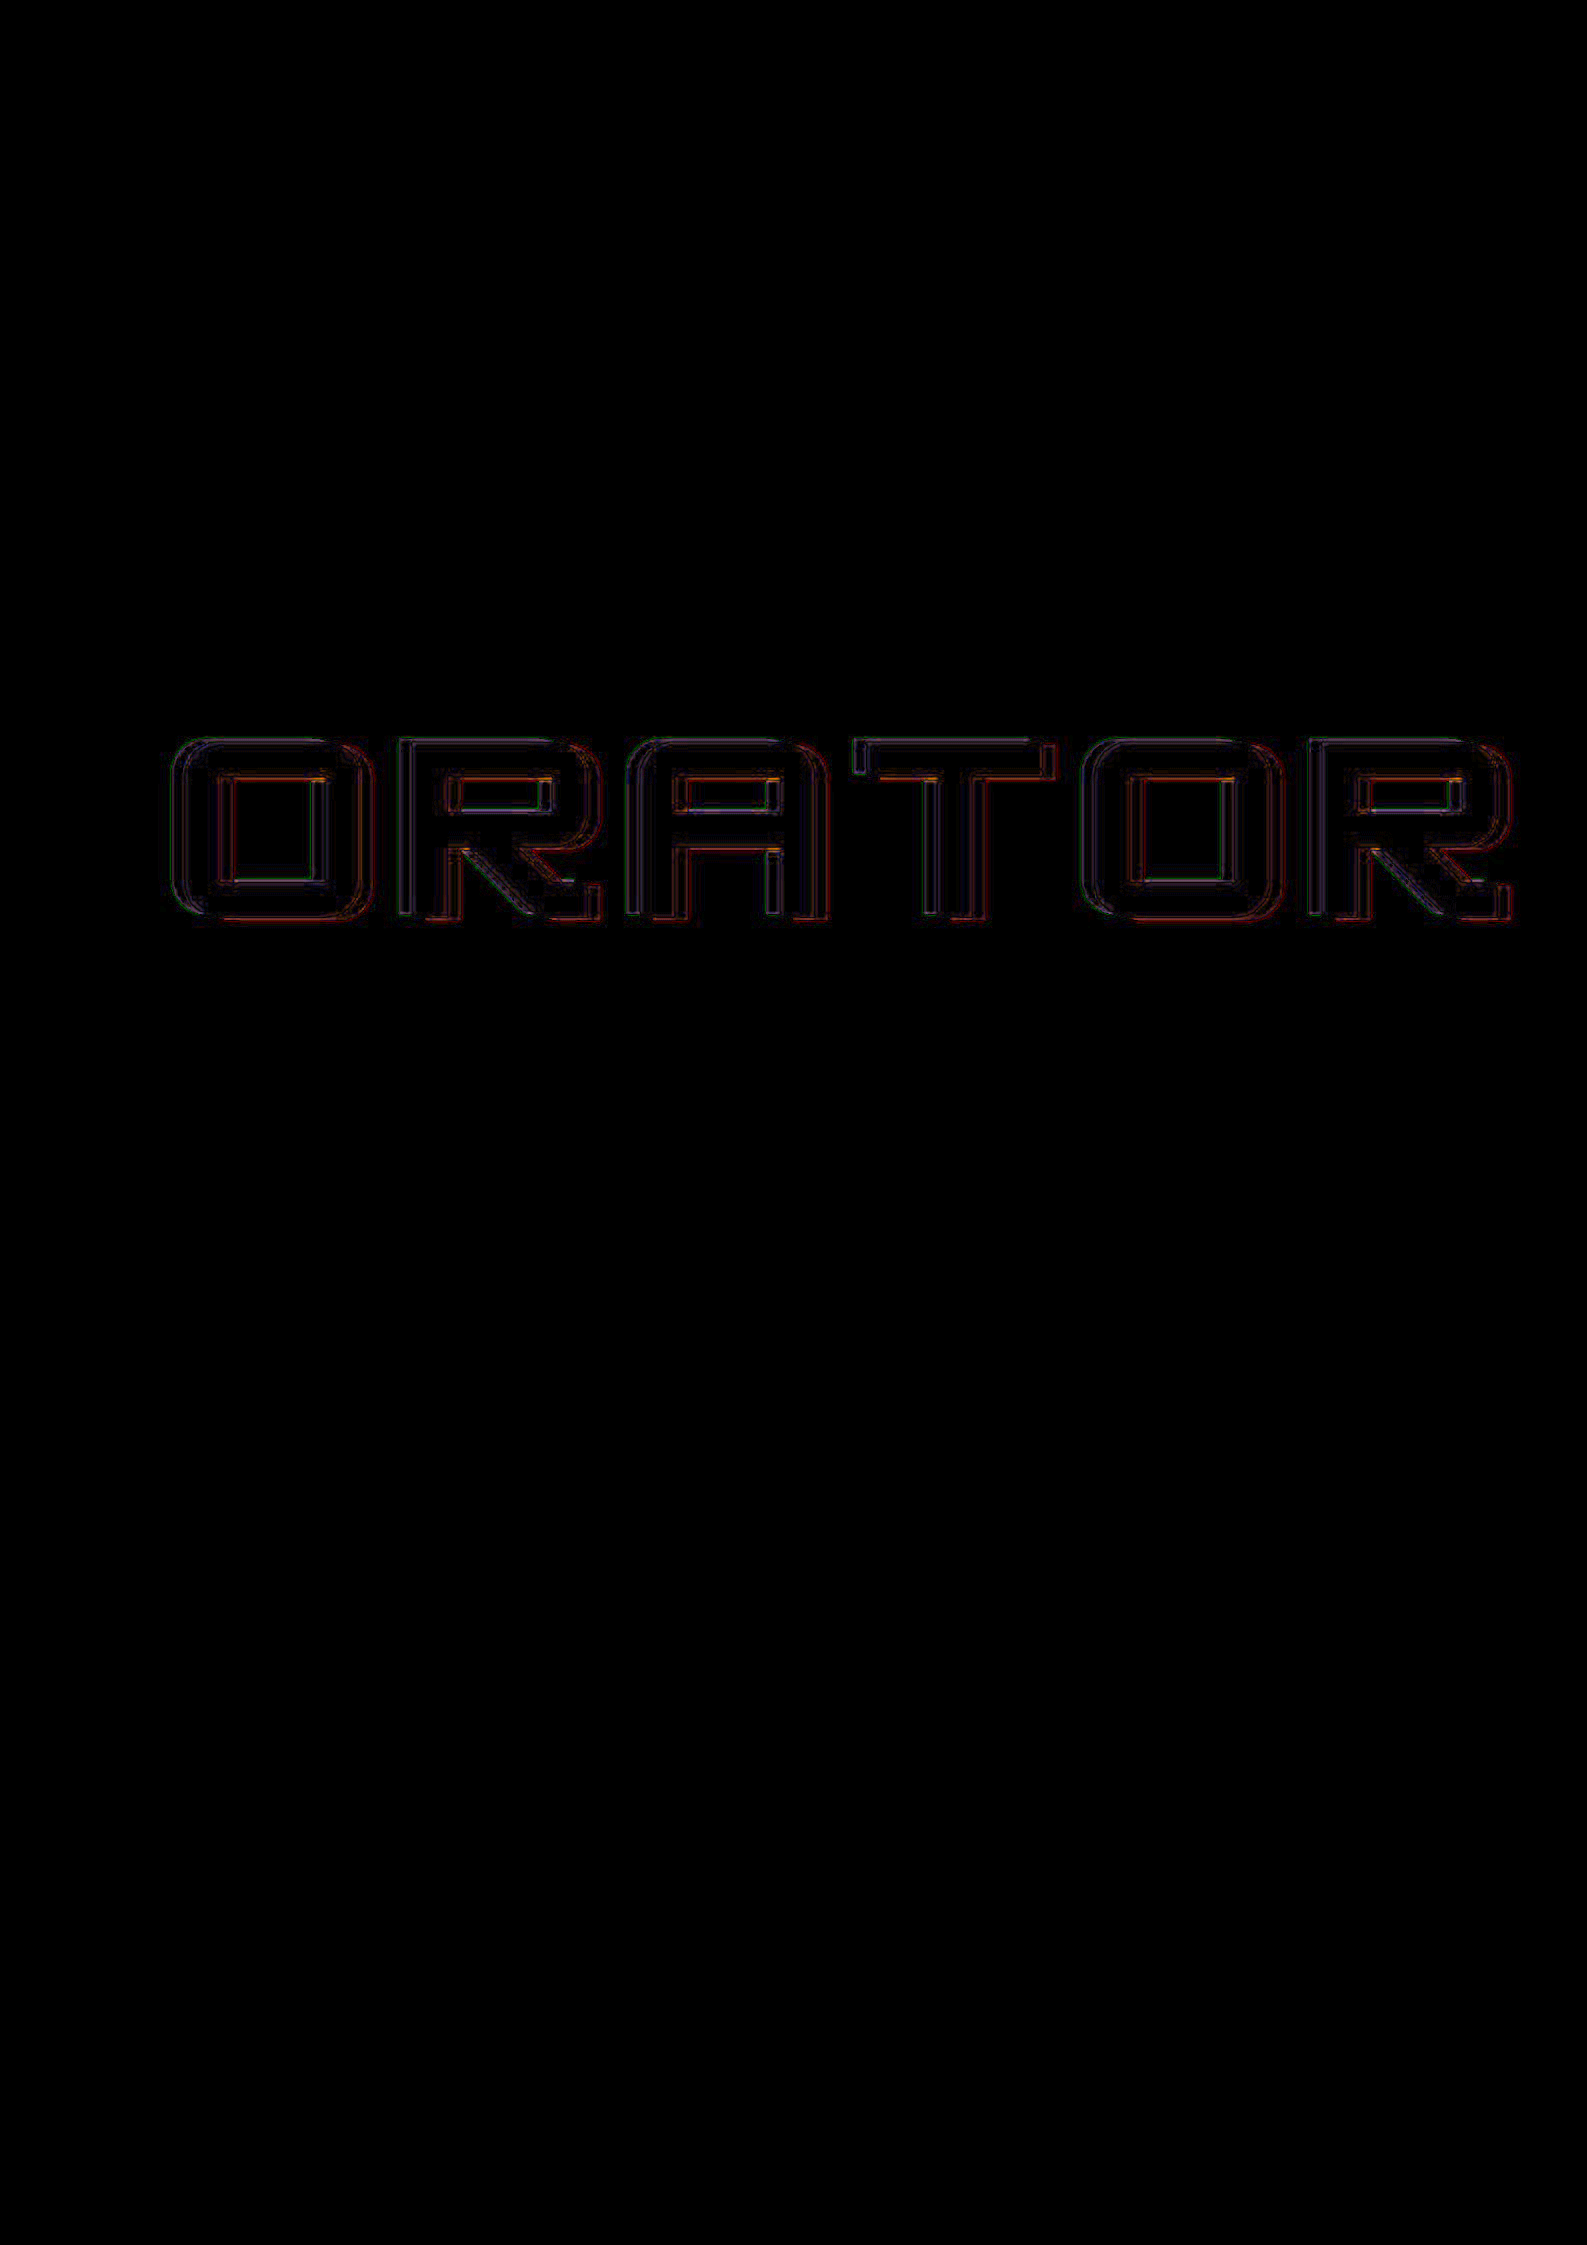

In [40]:
convert_to_ela_image(real_image_path, 85)

In [41]:
import numpy as np
path = r"C:\Users\vijja\Downloads\orator.jpg"
x2 = prepare_image(path)
x2 = x2.reshape(-1, 224, 224, 3)
x2

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [42]:
#TESTING THE IMAGE AND MAKING PREDICTION
arr = model.predict(x2)
print(arr)
if(arr[0][0]>arr[0][1]):
    print("IMAGE IS TAMPERED")
else:
    print("IMAGE IS AUTHENTICATED");

1/1 [==============================] - 0s 108ms/step
[[2.06309068e-08 2.19701690e-07 1.03539053e-08 7.26804160e-07
  3.67362048e-07 1.67539213e-07 4.78796274e-08 7.19564639e-07
  5.36122080e-08 2.97355314e-07 5.64462141e-07 8.62100933e-07
  6.83573944e-07 6.80009222e-08 1.37321479e-07 2.39304569e-07
  5.17968658e-07 3.02624592e-08 9.25048766e-08 3.45633367e-07
  4.45903680e-07 1.29360714e-07 4.68087826e-08 6.29145589e-08
  2.65662152e-07 6.53044765e-08 4.18527947e-07 1.14294089e-07
  5.46731620e-08 5.35918900e-07 2.75079657e-08 2.48809511e-06
  1.67806732e-07 2.95466492e-07 2.17244315e-06 4.83059850e-08
  1.32999673e-06 4.22836365e-07 7.18830051e-07 2.59072763e-08
  1.05773188e-06 6.20041476e-07 2.20548415e-08 1.50754005e-07
  3.11463646e-06 3.30517565e-07 1.62875835e-06 8.43141265e-07
  1.11668832e-07 6.24527319e-09 1.60138853e-08 3.22744739e-07
  4.41429574e-06 6.08343134e-06 1.94396525e-05 4.11629657e-07
  1.66415759e-07 5.28709023e-08 1.18170298e-07 2.66329971e-06
  6.11673067e-06 

In [ ]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import time

# PRE-PROCESSING THE IMAGE FOR TESTING
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

# st.snow()
# page_bg_img="""
# <style>
# [data-testid="stAppViewContainer"]{
# background-image: url("https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNmUxMjY3Y2E5YzcyMDM2M2E1NDRhZDNkMzExNDkxZTA0OWQ4M2E5YSZjdD1n/l41lMWt68HTJtPhRe/giphy.gif");
# background-color:cover;
# }
# </style>
# """
# st.markdown(page_bg_img,unsafe_allow_html=True)
model = load_model("model1.h5")
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality=quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

image_size = (128,128)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 85).resize(image_size)).flatten() / 255.0

def predict(imge):
    ela_img=prepare_image(imge)
    ela_img = ela_img.reshape(-1, 128, 128, 3)
    arr = model.predict(ela_img)
    print(arr)
    if (arr[0][0] > arr[0][1]):
        return "IMAGE IS TAMPERED"
    else:
        return "IMAGE IS AUTHENTICATED";



imge=st.file_uploader('Upload your file', type=['JPG', 'PNG', 'JPEG', 'TIFF'], accept_multiple_files=False, key=None, help=None,
                 on_change=None, args=None, kwargs=None, disabled=False, label_visibility="visible")
if(imge!=None):
    st.image(imge, caption='Uploaded Image')
#
if st.button('Predict'):
    with st.spinner(text="Checking....."):
        time.sleep(5)
    predict=predict(imge)
    st.write(predict)
#     recommend=recommendation(option)
#     for i in recommend:

#         st.write(i)
